# intro  - open dataset

In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('vocabolari/vocabolario_60k.txt', sep='\n', header=None, names=['words'])

In [42]:
#put all words in lowercase
data['words'] = data['words'].str.upper()

In [43]:
data.head()

,words
0,A
1,ABACA
2,ABACHE
3,ABACHI
4,ABACISTA


In [44]:
data.describe()

,words
count,279894
unique,279894
top,A
freq,1


In [45]:
data['len'] = data['words'].apply(lambda x: len(x))
data.head()

,words,len
0,A,1
1,ABACA,5
2,ABACHE,6
3,ABACHI,6
4,ABACISTA,8


In [46]:
# data_by_len = 
data.groupby('len').count()

,words
len,
1,4
2,50
3,241
4,1514
5,6696
6,12869
7,24985
8,34587
9,45308


### random stuff

In [47]:
data_by_len = [data[data['len']==i] for i in range(1, 20)]
len(data_by_len)

amounts = []

for i in range(1, 20):
    amounts.append(data_by_len[i-1].count()[0])
    # print(i, "->", data_by_len[i-1].count()[0])
# data_by_len[4].count()[0]

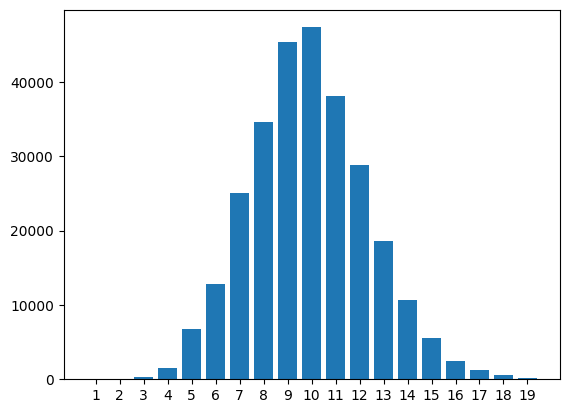

In [48]:
import matplotlib.pyplot as plt

# plot histograms of words amoount 
plt.bar(range(1, 20), amounts)
plt.xticks(range(1, 20))
# plt.xlabel = "length"
# plt.ylabel = "amount"

plt.show()

In [49]:
# import regex library and create and apply a pattern to filter all verbs in the infinite form
import re
pattern = re.compile("^.*[AEI]RE$")
d2  = data[data['words'].str.contains(pattern)]
d2.head()


,words,len
11,ABALIENARE,10
34,ABBACARE,8
45,ABBACCHIARE,11
76,ABBACINARE,10
107,ABBAGLIARE,10


### optimization

only taking 6 letters for now

In [50]:
# only 6 letters words
words6 = data[data['len']==6]
words6['words'].describe()

count      12869
unique     12869
top       ABACHE
freq           1
Name: words, dtype: object

In [51]:
#save words6['words'] as a csv file
words6['words'].to_csv('words6.csv', index=False, header=False)